# Premier neurone
fait en suivant la série de vidéo sur le deep learning de machine learnia

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


In [ ]:
# création d'un jeu de données - exemple pour les plantes toxiques
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

In [12]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [13]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [14]:
def log_loss(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [15]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [16]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [17]:
def predict(X, W, b):
    A = model(X, W, b)
    # print(A)
    return A >= 0.5

In [18]:
from sklearn.metrics import accuracy_score

In [36]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    W, b = initialisation(X)

    Loss = []

    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))

    plt.plot(Loss)
    plt.show()

    return (W, b)

0.91


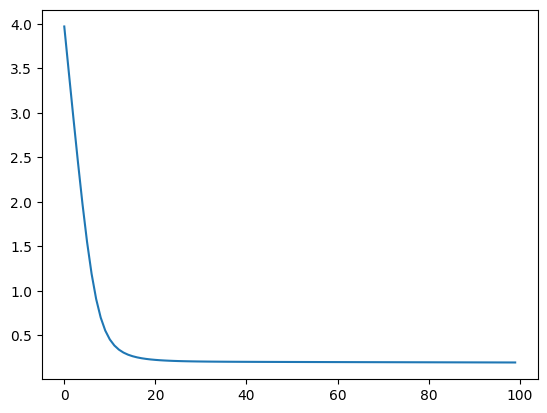

In [30]:
W, b = artificial_neuron(X, y)

# **Cat vs dog**
Le but de l'exervice est d'entrainer le modèle à l'aide d'un datasets donné afin qu'il puisse reconnaitre un chien ou un chat à partir d'une photo

In [61]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)  # Réduire l'échelle des poids
    b = 0.0  # Initialiser le biais à zéro
    return (W, b)

In [22]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [45]:
def log_loss(A, y):
    epsilon = 1e-15
    A = np.clip(A, epsilon, 1 - epsilon)
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [24]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [25]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [26]:
def predict(X, W, b):
    A = model(X, W, b)
    # print(A)
    return A >= 0.5

In [28]:
from sklearn.metrics import accuracy_score

In [58]:
def artificial_neuron(X, y, learning_rate = 0.001, n_iter = 1000):
    # initialisation W, b
    W, b = initialisation(X)

    Loss = []

    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)
        

    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))
    
        # Affichage des courbes
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(Loss)
    plt.title("Evolution de la fonction coût")
    plt.xlabel("Itérations")
    plt.ylabel("Loss")


    plt.plot(Loss)
    plt.show()

    return (W, b)

In [2]:
%pip install h5py
import numpy as np
import matplotlib.pyplot as plt


Defaulting to user installation because normal site-packages is not writeable


In [38]:
from utilities import *
X_train, y_train, X_test, y_test = load_data()


In [39]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1000, 64, 64)
X_test shape: (200, 64, 64)
y_train shape: (1000, 1)
y_test shape: (200, 1)


In [ ]:
# utilisation matplotlib pour afficher les 10 premieres images du datasets
plt.figure(figsize=(16,8))
for i in range(1,10):
    plt.subplot(4,5,i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout


In [8]:
#Normalisation des datas 
#on normalise que les images
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

# Vérification des valeurs
print(f"X_train_normalized: min = {X_train_normalized.min()}, max = {X_train_normalized.max()}")
print(f"X_test_normalized: min = {X_test_normalized.min()}, max = {X_test_normalized.max()}")

X_train_normalized: min = 0.0, max = 0.996078431372549
X_test_normalized: min = 0.0, max = 0.996078431372549


In [40]:
#flattening des datas
X_train_flatten = X_train_normalized.reshape(X_train_normalized.shape[0], -1)
X_test_flatten = X_test_normalized.reshape(X_test_normalized.shape[0], -1)

# Vérification des nouvelles dimensions
print(f"X_train_flatten shape: {X_train_flatten.shape}")  # devrait être (1000, 4096)
print(f"X_test_flatten shape: {X_test_flatten.shape}")    # devrait être (200, 4096)

X_train_flatten shape: (1000, 4096)
X_test_flatten shape: (200, 4096)


0.522


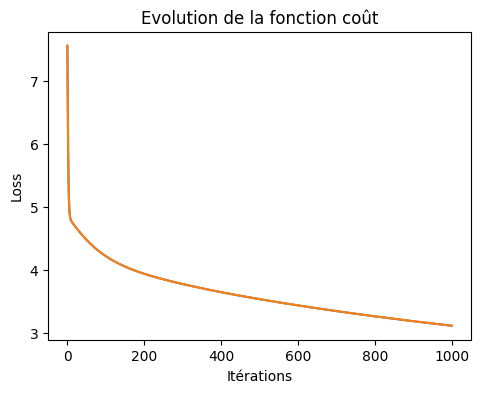

In [62]:
#Entrainer le modèle
W, b = artificial_neuron(X_train_flatten, y_train)